# 01 - Exploratory Data Analysis

PhiUSIIL phishing dataset (tabular engineered URL features).

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '..\\data\\raw\\PhiUSIIL_Phishing_URL_Dataset.csv'
LABEL_COL = 'label'

df = pd.read_csv(DATA_PATH)
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


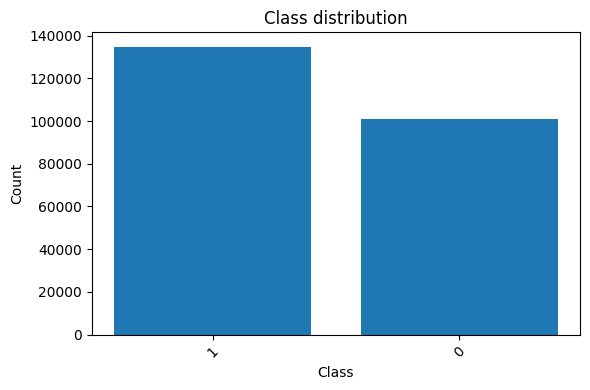

label
1    134850
0    100945
Name: count, dtype: int64

In [14]:
# Class distribution plot
if LABEL_COL not in df.columns:
    raise ValueError(f"Label column '{LABEL_COL}' not found in {DATA_PATH}")
counts = df[LABEL_COL].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
counts

In [15]:
# Tabular feature summaries
print('Shape:', df.shape)
print('\nDtypes:')
print(df.dtypes)
print('\nMissing values:')
print(df.isna().sum())
print('\nNumeric describe():')
print(df.select_dtypes(include='number').describe())

Shape: (235795, 56)

Dtypes:
FILENAME                          str
URL                               str
URLLength                       int64
Domain                            str
DomainLength                    int64
IsDomainIP                      int64
TLD                               str
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS              

In [16]:
# Optional URL samples (if column exists)
if 'URL' in df.columns:
    df['URL'].dropna().head()

**Insights**

Class balance should be checked early because heavy skew can inflate apparent accuracy for the majority class.
Very strong baseline scores on engineered URL features can indicate a curated dataset with highly separable patterns.
Real-world phishing detection can still perform worse due to drift, adversarial adaptation, and domain shift.